In [1]:
import pandas
import datetime

In [2]:
df = pandas.read_excel('price_data/SeriesReport-20200923060947_f7921a.xlsx')

In [3]:
df.head(10)

,"CPI Average Price Data, U.S. city average (AP)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Original Data Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,APU0000704111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Series Title:,"Bacon, sliced, per lb. (453.6 gm) in U.S. city...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Area:,U.S. city average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Item:,"Bacon, sliced, per lb. (453.6 gm)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Years:,1980 to 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
9,1980,1.453,1.41,1.361,1.323,1.266,1.271,1.371,1.469,1.617,1.641,1.684,1.711


In [4]:
item = df.iloc[5, 1]
item

'Bacon, sliced, per lb. (453.6 gm)'

In [5]:
df = df.drop(range(0, 9))

In [6]:
df.columns

Index(['CPI Average Price Data, U.S. city average (AP)', 'Unnamed: 1',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

In [7]:
column_names = list(range(0, 13))
column_names[0] = 'year'
column_names

['year', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [8]:
df.columns = column_names
df.head()

,year,1,2,3,4,5,6,7,8,9,10,11,12
9,1980,1.453,1.41,1.361,1.323,1.266,1.271,1.371,1.469,1.617,1.641,1.684,1.711
10,1981,1.668,1.638,1.596,1.53,1.548,1.601,1.665,1.693,1.753,1.78,1.766,1.751
11,1982,1.747,1.811,1.824,1.894,1.982,2.07,2.101,2.2,2.36,2.334,2.186,2.128
12,1983,2.123,2.147,2.072,2.003,1.951,1.91,1.918,1.876,1.914,1.857,1.773,1.758
13,1984,1.812,1.881,1.803,1.798,1.817,1.832,1.901,1.902,1.889,1.895,1.867,1.89


In [9]:
df = pandas.melt(df, id_vars=['year'], value_vars=df.columns[1:])

In [10]:
df.head(10)

,year,variable,value
0,1980,1,1.453
1,1981,1,1.668
2,1982,1,1.747
3,1983,1,2.123
4,1984,1,1.812
5,1985,1,1.952
6,1986,1,1.935
7,1987,1,2.118
8,1988,1,1.954
9,1989,1,1.805


In [11]:
df['item'] = item
df['month'] = df['variable']
df['day'] = 1
df['date'] = pandas.to_datetime(df[['year', 'month', 'day']])
df.head()

,year,variable,value,item,month,day,date
0,1980,1,1.453,"Bacon, sliced, per lb. (453.6 gm)",1,1,1980-01-01
1,1981,1,1.668,"Bacon, sliced, per lb. (453.6 gm)",1,1,1981-01-01
2,1982,1,1.747,"Bacon, sliced, per lb. (453.6 gm)",1,1,1982-01-01
3,1983,1,2.123,"Bacon, sliced, per lb. (453.6 gm)",1,1,1983-01-01
4,1984,1,1.812,"Bacon, sliced, per lb. (453.6 gm)",1,1,1984-01-01


In [12]:
df.index = df['date']
df.head()

,year,variable,value,item,month,day,date
date,,,,,,,
1980-01-01,1980,1,1.453,"Bacon, sliced, per lb. (453.6 gm)",1,1,1980-01-01
1981-01-01,1981,1,1.668,"Bacon, sliced, per lb. (453.6 gm)",1,1,1981-01-01
1982-01-01,1982,1,1.747,"Bacon, sliced, per lb. (453.6 gm)",1,1,1982-01-01
1983-01-01,1983,1,2.123,"Bacon, sliced, per lb. (453.6 gm)",1,1,1983-01-01
1984-01-01,1984,1,1.812,"Bacon, sliced, per lb. (453.6 gm)",1,1,1984-01-01


In [13]:
df = df.drop(['year', 'month', 'variable', 'day', 'date'], axis=1)
df.head()

,value,item
date,,
1980-01-01,1.453,"Bacon, sliced, per lb. (453.6 gm)"
1981-01-01,1.668,"Bacon, sliced, per lb. (453.6 gm)"
1982-01-01,1.747,"Bacon, sliced, per lb. (453.6 gm)"
1983-01-01,2.123,"Bacon, sliced, per lb. (453.6 gm)"
1984-01-01,1.812,"Bacon, sliced, per lb. (453.6 gm)"


<AxesSubplot:xlabel='date'>

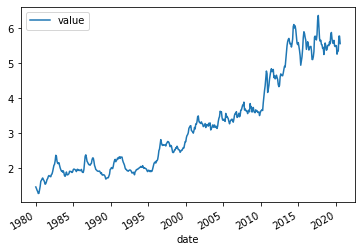

In [14]:
df.plot.line()